# Wrangle and Analyze Data

# Gathering data

### 1) Twitter API file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
twitter=pd.read_json("tweet-jsonx.txt",lines=True)

In [3]:
twitter.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### 2) Twitter archive file

In [4]:
archive=pd.read_csv("twitter-archive-enhanced.csv")

In [5]:
archive.head(2)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### 3) Image prediction file

In [6]:
import requests

In [7]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response=requests.get(url)

In [8]:
with open("image_predictions.tsv",mode='wb') as file:
    file.write(response.content)

In [9]:
img=pd.read_csv("image_predictions.tsv",sep="\t")

In [10]:
img.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


# Assessing data

### 1) Twitter API :

In [11]:
twitter.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [12]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

##### Quality:
 * Deleting unwanted columns.
 * Null values in columns
 
##### Tidiness:
 * Merging retweet_count and favorite_count with twitter archive.

### 2) Twitter archive:

In [13]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [16]:
archive.name.sort_values()

1035     Abby
1021     Abby
938       Ace
1933     Acro
1327    Adele
        ...  
1031     very
773      very
1097     very
819      very
1385     very
Name: name, Length: 2356, dtype: object

In [17]:
archive.query('rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [18]:
archive.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


##### QUALITY 
* Delete unwanted columns.
* Missing value in columns.
* Numerator having value as 0.
* Denominator having value other than 10.
* Timestamp should be date type.
* Names of dog that are unlikely.
* Float numerator rating values have been incorrectly entered in the column.
* Due to different denominator values comparison of rating cannot be adequate.

##### Tidiness:
* Dog Stages classification should be 1 column.


## 2) Image prediction:

In [19]:
img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [21]:
img.tweet_id.duplicated().sum()

0

In [22]:
img.jpg_url.duplicated().sum()

66

#### Quality:
* Duplicate jpg_url present
* Only 2075 entries while in archive 2536 entries.
#### Tideness:
* Column names should be more descriptive

# Cleaning:

## Twitter archieve data

###### Dropping unwanted columns (with null data):

In [23]:
archive.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','source','retweeted_status_timestamp','source','expanded_urls'], axis = 1, inplace = True)

In [24]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   text                2356 non-null   object
 3   rating_numerator    2356 non-null   int64 
 4   rating_denominator  2356 non-null   int64 
 5   name                2356 non-null   object
 6   doggo               2356 non-null   object
 7   floofer             2356 non-null   object
 8   pupper              2356 non-null   object
 9   puppo               2356 non-null   object
dtypes: int64(3), object(7)
memory usage: 119.7+ KB


###### Replacing unlikely dog names with NaN

In [25]:
archive['name'].replace("old",np.NaN, inplace=True)
archive['name'].replace("none",np.NaN, inplace=True)
archive['name'].replace("the",np.NaN, inplace=True)
archive['name'].replace("actually",np.NaN, inplace=True)
archive['name'].replace("such",np.NaN, inplace=True)
archive['name'].replace("by",np.NaN, inplace=True)
archive['name'].replace("all",np.NaN, inplace=True)
archive['name'].replace("a",np.NaN, inplace=True)
archive['name'].replace("an",np.NaN, inplace=True)
archive['name'].replace("getting",np.NaN, inplace=True)
archive['name'].replace("not",np.NaN, inplace=True)
archive['name'].replace("very",np.NaN, inplace=True)
archive['name'].replace("just",np.NaN, inplace=True)
archive['name'].replace("his",np.NaN, inplace=True)
archive['name'].replace("General",np.NaN, inplace=True)
archive['name'].replace("my",np.NaN, inplace=True)
archive['name'].replace("None",np.NaN, inplace=True)
archive['name'].replace("O",np.NaN, inplace=True)
archive['name'].replace("officially",np.NaN, inplace=True)


In [26]:
archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout', 'Gizmo',
       'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle',

###### Replacing the 4 columns for dog classification into one:

In [27]:
archive.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None


In [28]:
archive.replace('None', np.nan)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,6,10,NaN,NaN,NaN,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,9,10,NaN,NaN,NaN,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,7,10,NaN,NaN,NaN,NaN,NaN


In [29]:
archive['dog_class'] = archive[archive.columns[6:]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

In [30]:
archive.dog_class.unique()

array(['None,None,None,None', 'doggo,None,None,None',
       'None,None,None,puppo', 'None,None,pupper,None',
       'None,floofer,None,None', 'doggo,None,None,puppo',
       'doggo,floofer,None,None', 'doggo,None,pupper,None'], dtype=object)

In [31]:
archive.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_class
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,"None,None,None,None"
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,"None,None,None,None"


In [32]:
archive['dog_class'].replace("None,None,None,None","NaN", inplace=True)
archive['dog_class'].replace("doggo,None,None,None","doggo", inplace=True)
archive['dog_class'].replace("None,floofer,None,None","floofer", inplace=True)
archive['dog_class'].replace("None,None,pupper,None","pupper", inplace=True)
archive['dog_class'].replace("None,None,None,puppo","puppo", inplace=True)
archive['dog_class'].replace("doggo,None,pupper,None","doggo,pupper", inplace=True)
archive['dog_class'].replace("doggo,floofer,None,None","doggo,floofer", inplace=True)
archive['dog_class'].replace("doggo,None,None,puppo","doggo,puppo", inplace=True)

In [33]:
archive.dog_class.unique()

array(['NaN', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

In [34]:
archive.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace = True)

###### Changing datatype of timestamp

In [35]:
archive['timestamp'] = archive['timestamp'].astype('datetime64[ns]')

In [36]:
archive.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
text                          object
rating_numerator               int64
rating_denominator             int64
name                          object
dog_class                     object
dtype: object

In [37]:
archive.shape

(2356, 7)

#### Correcting the rating of numerator

In [38]:
li=archive.text.tolist()
l=[]
for i in range(2356):
    x=li[i]
    import re
    s=re.findall("\d+\.\d+",x )
    
    if s:
        archive.loc[i,'rating_numerator'] = s[0]
        

In [39]:
archive.rating_numerator.unique

<bound method Series.unique of 0       13
1       13
2       12
3       13
4       12
        ..
2351     5
2352     6
2353     9
2354     7
2355     8
Name: rating_numerator, Length: 2356, dtype: object>

###### Finding rating (for better comparison)

In [40]:
archive.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
text                          object
rating_numerator              object
rating_denominator             int64
name                          object
dog_class                     object
dtype: object

In [41]:
archive['rating_numerator'] = archive['rating_numerator'].astype(float)

In [42]:
archive['rating'] =archive['rating_numerator'] / archive['rating_denominator']
archive.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_class,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN,1.2


## Image prediction dataset

##### Dropping duplicate image url

In [43]:
img = img.drop_duplicates(subset=['jpg_url'], keep='last')

In [44]:
img['jpg_url'].duplicated().sum()

0

###### Changing column names:

In [45]:
img.rename(columns={'p1_conf': '1st_predict_conf', 'p1': '1st_predict','p1_dog': '1st_isdog', 'p2': '2nd_predict','p2_dog': '2nd_isdog', 'p2_conf': '2nd_prediction_conf','p3': '3rd_predict', 'p3_conf': '3rd_prediction_conf','p3_dog':'3rd_isdog'}, inplace=True)

In [46]:
img.head(2)

,tweet_id,jpg_url,img_num,1st_predict,1st_predict_conf,1st_isdog,2nd_predict,2nd_prediction_conf,2nd_isdog,3rd_predict,3rd_prediction_conf,3rd_isdog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


# Twitter API

###### Renaming id column:

In [47]:
twitter = twitter.rename(columns = {'id':'tweet_id'})
twitter.head(1)

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


###### Drop unwanted columns

In [48]:
twitter.drop(['retweeted_status','created_at','user','quoted_status_id','created_at','quoted_status_id_str','quoted_status','is_quote_status','contributors','place','favorited','retweeted','geo','coordinates','in_reply_to_user_id_str','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_screen_name','possibly_sensitive_appealable','display_text_range','entities','extended_entities','source','id_str','truncated','possibly_sensitive','lang'],axis=1,inplace=True)

### Merging Twitter API and Twitter archive:

In [50]:
merge=twitter.merge(archive,how='inner').reset_index(drop=True)

In [51]:
merge.head()

,tweet_id,full_text,retweet_count,favorite_count,timestamp,text,rating_numerator,rating_denominator,name,dog_class,rating
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8853,39467,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,1.3
1,892177421306343426,This is Tilly. She's just checking pup on you....,6514,33819,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,1.3
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4328,25461,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,1.2
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,8964,42908,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN,1.3
4,891327558926688256,This is Franklin. He would like you to stop ca...,9774,41048,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN,1.2


In [52]:
merge.to_csv('twitter_archive_master.csv')

# Data analysis and Visualisation

In [53]:
merge.describe()

,tweet_id,retweet_count,favorite_count,rating_numerator,rating_denominator,rating
count,2.354000e+03,2354.000000,2354.000000,2354.000000,2354.00000,2354.0
mean,7.426978e+17,3164.797366,8080.968564,13.084919,10.45582,inf
std,6.852812e+16,5284.770364,11814.771334,45.889374,6.74809,NaN
min,6.660209e+17,0.000000,0.000000,0.000000,0.00000,0.0
25%,6.783975e+17,624.500000,1415.000000,10.000000,10.00000,1.0
50%,7.194596e+17,1473.500000,3603.500000,11.000000,10.00000,1.1
75%,7.993058e+17,3652.000000,10122.250000,12.000000,10.00000,1.2
max,8.924206e+17,79515.000000,132810.000000,1776.000000,170.00000,inf


Most common rating is 11/10.

## Relation between Favorite & Retweet Count

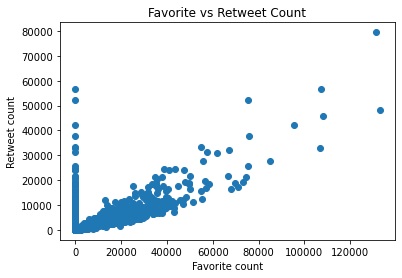

In [54]:
plt.scatter(merge['favorite_count'], merge['retweet_count'])
plt.xlabel('Favorite count');
plt.ylabel('Retweet count');
plt.title('Favorite vs Retweet Count');
plt.show()

In [55]:
merge['favorite_count'].corr(merge['retweet_count'])

0.7028813596145037

The above two results show that there is a strong correlation between the favorite count and retweet count.

### Max favorite count: 

In [56]:
fav_pop=merge.sort_values(by=['favorite_count'],ascending=False)
fav_pop.head(10)

,tweet_id,full_text,retweet_count,favorite_count,timestamp,text,rating_numerator,rating_denominator,name,dog_class,rating
412,822872901745569793,Here's a super supportive puppo participating ...,48265,132810,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,13.0,10,NaN,puppo,1.3
1037,744234799360020481,Here's a doggo realizing you can stand in a po...,79515,131075,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,13.0,10,NaN,doggo,1.3
65,879415818425184262,This is Duddles. He did an attempt. 13/10 some...,45849,107956,2017-06-26 19:07:24,This is Duddles. He did an attempt. 13/10 some...,13.0,10,Duddles,NaN,1.3
533,807106840509214720,This is Stephan. He just wants to help. 13/10 ...,56625,107015,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,13.0,10,Stephan,NaN,1.3
134,866450705531457537,This is Jamesy. He gives a kiss to every other...,32883,106827,2017-05-22 00:28:40,This is Jamesy. He gives a kiss to every other...,13.0,10,Jamesy,pupper,1.3
448,819004803107983360,This is Bo. He was a very good First Doggo. 14...,42228,95450,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14...,14.0,10,Bo,doggo,1.4
114,870374049280663552,This is Zoey. She really likes the planet. Wou...,27680,85011,2017-06-01 20:18:38,This is Zoey. She really likes the planet. Wou...,13.0,10,Zoey,NaN,1.3
536,806629075125202948,"""Good afternoon class today we're going to lea...",37911,75639,2016-12-07 22:38:52,"""Good afternoon class today we're going to lea...",13.0,10,NaN,NaN,1.3
168,859196978902773760,We only rate dogs. This is quite clearly a smo...,25661,75193,2017-05-02 00:04:57,We only rate dogs. This is quite clearly a smo...,12.0,10,quite,NaN,1.2
1077,739238157791694849,Here's a doggo blowing bubbles. It's downright...,52360,75163,2016-06-04 23:31:25,Here's a doggo blowing bubbles. It's downright...,13.0,10,NaN,doggo,1.3


### Max retweet count:

In [57]:
retweet_pop=merge.sort_values(by=['retweet_count'],ascending=False)
retweet_pop.head(10)

,tweet_id,full_text,retweet_count,favorite_count,timestamp,text,rating_numerator,rating_denominator,name,dog_class,rating
1037,744234799360020481,Here's a doggo realizing you can stand in a po...,79515,131075,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,13.0,10,NaN,doggo,1.3
259,842892208864923648,RT @dog_rates: This is Stephan. He just wants ...,56625,0,2017-03-18 00:15:37,RT @dog_rates: This is Stephan. He just wants ...,13.0,10,Stephan,NaN,1.3
533,807106840509214720,This is Stephan. He just wants to help. 13/10 ...,56625,107015,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,13.0,10,Stephan,NaN,1.3
816,770743923962707968,RT @dog_rates: Here's a doggo blowing bubbles....,52360,0,2016-08-30 22:04:05,RT @dog_rates: Here's a doggo blowing bubbles....,13.0,10,NaN,doggo,1.3
1077,739238157791694849,Here's a doggo blowing bubbles. It's downright...,52360,75163,2016-06-04 23:31:25,Here's a doggo blowing bubbles. It's downright...,13.0,10,NaN,doggo,1.3
412,822872901745569793,Here's a super supportive puppo participating ...,48265,132810,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,13.0,10,NaN,puppo,1.3
65,879415818425184262,This is Duddles. He did an attempt. 13/10 some...,45849,107956,2017-06-26 19:07:24,This is Duddles. He did an attempt. 13/10 some...,13.0,10,Duddles,NaN,1.3
448,819004803107983360,This is Bo. He was a very good First Doggo. 14...,42228,95450,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14...,14.0,10,Bo,doggo,1.4
445,819015337530290176,RT @dog_rates: This is Bo. He was a very good ...,42228,0,2017-01-11 02:57:27,RT @dog_rates: This is Bo. He was a very good ...,14.0,10,Bo,doggo,1.4
154,861769973181624320,"RT @dog_rates: ""Good afternoon class today we'...",37911,0,2017-05-09 02:29:07,"RT @dog_rates: ""Good afternoon class today we'...",13.0,10,NaN,NaN,1.3


,tweet_id,full_text,retweet_count,favorite_count,timestamp,text,rating_numerator,rating_denominator,name,dog_class,rating,year
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8853,39467,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,1.3,2017
1,892177421306343426,This is Tilly. She's just checking pup on you....,6514,33819,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,1.3,2017


## Has the site become more popular over the years? 

In [ ]:
merge['year'] = pd.DatetimeIndex(merge['timestamp']).year
merge.head(2)

In [59]:
x=merge.year.sort_values()
yr=x.unique()

In [60]:
re=merge.groupby(['year'])['retweet_count'].mean()
re

year
2015    1097.304348
2016    3123.785956
2017    6225.058091
Name: retweet_count, dtype: float64

In [61]:
fav=merge.groupby(['year'])['favorite_count'].mean()
fav

year
2015     2519.078261
2016     6997.131134
2017    18700.885892
Name: favorite_count, dtype: float64

### Mean Retweet count vs Year

Text(0.5, 1.0, 'Mean Retweet count vs Year')

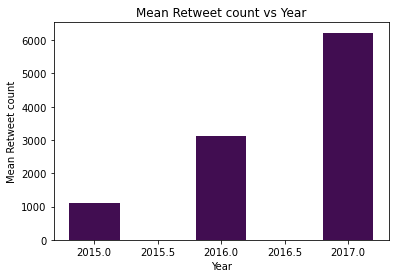

In [65]:
plt.bar(yr,re,width=0.4,color='#410d51')
plt.xlabel("Year")
plt.ylabel("Mean Retweet count")
plt.title("Mean Retweet count vs Year")

### Mean Favorite count vs Year

Text(0.5, 1.0, 'Mean Favorite count vs Year')

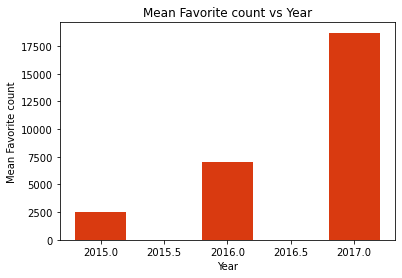

In [66]:
plt.bar(yr,fav,width=0.4,color='#d93a10')
plt.xlabel("Year")
plt.ylabel("Mean Favorite count")
plt.title("Mean Favorite count vs Year")

From the above two graphs it is clear that the page has gained a lot of popularity over the years